In [1]:
import tensorflow as tf
import cv2
from random import shuffle
import glob
import numpy as np
import sys

In [13]:
shuffle_data = True

data_path = "birds_images/train/birds/*.jpg"

# Reading images and labels from the folder
images = glob.glob(data_path)
labels = [0 if 'cuckoo' in img else 1 for img in images]

if shuffle_data:
    c = list(zip(images,labels))
    shuffle(c)
    images, labels = zip(*c)

# Dividing data into training and test
train_images = images[0:int(0.8*len(images))]
train_labels = labels[0:int(0.8*len(labels))]

test_images = images[int(0.8*len(images)):]
test_labels = labels[int(0.8*len(labels)):]

In [29]:
def load_image(image):
    img = cv2.imread(image)
    img = cv2.resize(img, (224,224), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    return img

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [32]:
train_filename = 'train.tfrecords'

writer = tf.python_io.TFRecordWriter(train_filename)

for i in range(len(train_images)):
    if not i % 10:
        print('Train data: {}/{}'.format(i,len(train_images)))
        sys.stdout.flush()
        
    img = load_image(train_images[i])
    label = train_labels[i]
    
    feature = {'train/label': _int64_feature(label),
               'train/image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Train data: 0/24
Train data: 10/24
Train data: 20/24


In [33]:
test_filename = 'test.tfrecords'

writer = tf.python_io.TFRecordWriter(test_filename)

for i in range(len(test_images)):
    if not i % 10:
        print('Test data: {}/{}'.format(i,len(test_images)))
        sys.stdout.flush()
        
    img = load_image(test_images[i])
    label = test_labels[i]
    
    feature = {'test/label': _int64_feature(label),
               'test/image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Test data: 0/6


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


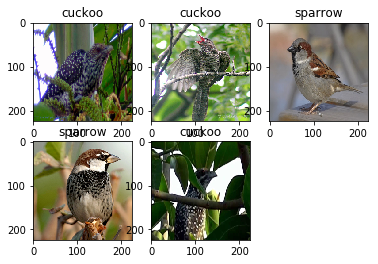

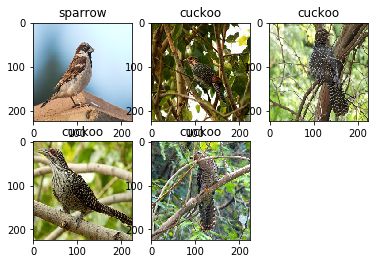

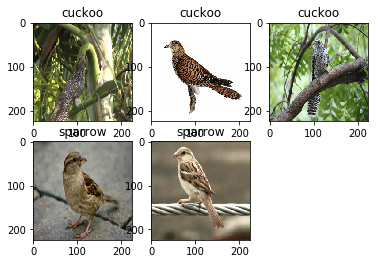

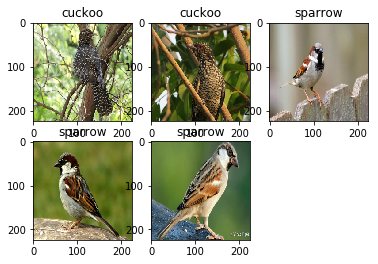

OutOfRangeError: RandomShuffleQueue '_19_shuffle_batch_3/random_shuffle_queue' is closed and has insufficient elements (requested 5, current size 4)
	 [[{{node shuffle_batch_3}} = QueueDequeueManyV2[component_types=[DT_FLOAT, DT_INT32], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](shuffle_batch_3/random_shuffle_queue, shuffle_batch_3/n)]]

Caused by op 'shuffle_batch_3', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/asyncio/base_events.py", line 295, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/asyncio/base_events.py", line 1254, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-d60cc051c4e5>", line 14, in <module>
    images, labels = tf.train.shuffle_batch([image,label], batch_size=5, capacity=30,num_threads=1,min_after_dequeue=5)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tensorflow/python/training/input.py", line 1301, in shuffle_batch
    name=name)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tensorflow/python/training/input.py", line 847, in _shuffle_batch
    dequeued = queue.dequeue_many(batch_size, name=name)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tensorflow/python/ops/data_flow_ops.py", line 476, in dequeue_many
    self._queue_ref, n=n, component_types=self._dtypes, name=name)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tensorflow/python/ops/gen_data_flow_ops.py", line 3481, in queue_dequeue_many_v2
    component_types=component_types, timeout_ms=timeout_ms, name=name)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/Users/rajaraju/.virtualenvs/cv3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

OutOfRangeError (see above for traceback): RandomShuffleQueue '_19_shuffle_batch_3/random_shuffle_queue' is closed and has insufficient elements (requested 5, current size 4)
	 [[{{node shuffle_batch_3}} = QueueDequeueManyV2[component_types=[DT_FLOAT, DT_INT32], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](shuffle_batch_3/random_shuffle_queue, shuffle_batch_3/n)]]


In [38]:
data_path = 'train.tfrecords'

with tf.Session() as sess:
    feature = {'train/image': tf.FixedLenFeature([],tf.string),
              'train/label': tf.FixedLenFeature([], tf.int64)}
    
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    reader = tf.TFRecordReader()
    _,serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(serialized_example, features=feature)
    image = tf.decode_raw(features['train/image'],tf.float32)
    label = tf.cast(features['train/label'],tf.int32)
    image = tf.reshape(image, [224,224,3])
    images, labels = tf.train.shuffle_batch([image,label], batch_size=5, capacity=30,num_threads=1,min_after_dequeue=5)
    
    init_op = tf.group(tf.global_variables_initializer(),tf.local_variables_initializer())
    sess.run(init_op)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    for batch_index in range(5):
        img, lbl = sess.run([images, labels])
        
        img = img.astype(np.uint8)
        
        for j in range(5):
            plt.subplot(2,3,j+1)
            plt.imshow(img[j, ...])
            plt.title('cuckoo' if lbl[j] == 0 else 'sparrow')
        plt.show()
        
        
    coord.request_stop()
    
    coord.join(threads)
#     sess.close()
    